# **Лабораторная работа № 4.**
### по курсу «Нейроинформатика»
## **Тема: Сети с радиальными базисными элементами**



> Студент: Овечкин В.А.

> Группа: М8О-408Б-18

> Преподаватель: Аносова Н.П.

> Оценка:

## **Цель работы**: 
Исследование свойств некоторых видов сетей с радиальными базисными элементами, алгоритмов обучения, а также применение сетей в задачах классификации и
аппроксимации функции.

## **Постановка задачи:**
1. Использовать вероятностную нейронную сеть для классификации точек в случае, когда
классы не являются линейно разделимыми.
2. Использовать сеть с радиальными базисными элементами (RBF) для классификации точек
в случае, когда классы не являются линейно разделимыми.
3. Использовать обобщенно-регрессионную нейронную сеть для аппроксимации функции.
Проверить работу сети с рыхлыми данными.

###Теория
Сеть радиально-базизных функций - нейросеть, которая использует радиальные базисные функции в роли активационных.
Радиальная базисная функция - функция из набора однотипных радиальных функций, которые используются как активационная функция в одном слое искусственной нейросети.
Радиальная функция - по сути любая вещественная функция, значение которой зависит только от расстояния до дачала координат: $f(x)=f(||x||)$, или от расстояния между "центром" и точкой $f(x,с)=f(||x-c||)$. В качестве нормы выступает евклидово расстояние, но возможно использование других метрик.
Чаще всего используется функция Гаусса:$h(x)=exp(-(x-c)^2 / r^2))$

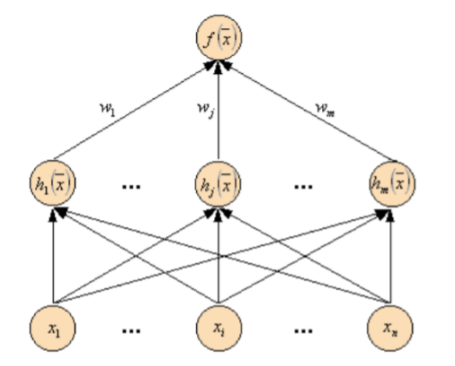


Сети с РБФ обычно имеют три уровня: входной уровень, скрытый слой с нелинейной функцией активации РБФ и линейный выходной. Входом является вектор вещественных чисел. Выход представляет собой скалярную функцию входного вектора $φ(x)=Σ_{i=1}^N a_i*ρ(||x-c_i||)$ где N - число нейронов на скрытом уровне, $c_i$ - центральный вектор i-го нейрона, $а_i$ - вес i-го нейрона в линейном выходном слое.

*Вероятностная нейросеть*- это нейросеть прямого распространения, которая используется в задачах классификации и распознавании объектов. Первый слой вычисляет расстояние от входных векторов до обучающих входных векторов, что создаёт вектор, элементы которого указывают, насколько близок ввод к обучающему. Второй уровень суммирует вклад для каждого класса входов и выдаёт чистый выход в виде вероятностного вектора. Конкурирующая передаточная функция на выходе второго уровня выбирает максимум из вероятностей вектора и выдаёт 1 для целевого и 0 для нецелевого классов. В Вероятностной нейросети операции организованы в многоуровневую сеть прямого распространения с четырьмя уровнями: входной слой, слой паттерна, слой суммирования и выходной слой.

*Обобщенно-регрессионная нейросеть*: как и в РБФ сети имеет радиально- базисный слой с числом нейронов, равных числу элементов или менее обучающего множества, но также включает линейный слой. Данная сеть копирует в себя все обучающие наблюдения и использует их для оценки отклика в произвольной точке. Окончательная выходная оценка сети - взвешенное среднее выходов по всем обучающим наблюдениям, где величины весов отражают расстояние от этих наблюдений до точки, в которой производится оценка(точки, которые ближе вносят больший вклад в оценку). Первый промежуточный слой сети состоит из радиальных элементов. Второй промежуточный слой содержит элементы, помогающие оценить взвешенное среднее и является линейным. Для этого используется следующее: чтобы получить из взвешенной суммы взвешенное среднее, сумму вычисляет специальный элемент второго слоя, после его в выходном слое производится деление с помощью специальных элементов деления. Таким образом число элементов во втором промежуточном слое на 1 больше, чем в выходном слое. Процесс обучения аналогичен обучению РБФ-сети. Первоначально настраиваются центры базисных функций, ппосле чего с фиксированными параметрами РБФ нейронов обучается выходной слой.

# Листинг кода

In [ ]:
!pip install neupy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from neupy.algorithms import PNN, GRNN

  Using cached tensorflow-1.13.2-cp37-cp37m-manylinux1_x86_64.whl (92.7 MB)
  Using cached tensorflow_estimator-1.13.0-py2.py3-none-any.whl (367 kB)
  Using cached tensorboard-1.13.1-py3-none-any.whl (3.2 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensor

Опишем функции для получения множества точек элипса и параболы.

In [ ]:
def get_points_elips(a :float, b :float, alpha :float, x0 :float, y0 :float ):
  t = np.arange(0.0, 2*np.pi, 0.025)
  x = a*np.cos(t) + x0 
  y = b*np.sin(t) + y0 
  xx = x*np.cos(alpha) - y*np.sin(alpha)
  yy = x*np.sin(alpha) + y*np.cos(alpha)
  points = np.zeros((len(xx), 2))
  points[:,0]=xx
  points[:,1]=yy  
  return points

def get_points_parabola(p :float, alpha :float, x0 :float, y0 :float):
  t = np.arange(0.0, 2*np.pi, 0.05)
  x = t ** 2 / ( 2 * p ) 
  y = t  
  xx = x*np.cos(alpha) - y*np.sin(alpha) + x0
  yy = x*np.sin(alpha) + y*np.cos(alpha) + y0
  points = np.zeros((len(xx), 2))
  points[:,0]=xx
  points[:,1]=yy  
  return points


Получим и отрисуем входные данные. 

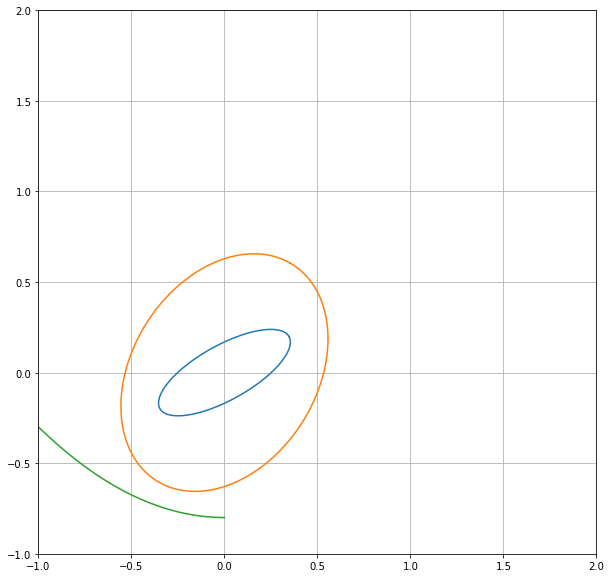

In [ ]:
points1 = get_points_elips(0.4, 0.15, np.pi/6, 0, 0)
points2 = get_points_elips(0.7, 0.5, np.pi/3, 0, 0)
points3 = get_points_parabola(1, np.pi/2, 0, -0.8)


plt.figure(figsize=(10, 10))
plt.grid(True)
plt.gca().set_ylim([-1, 2])
plt.gca().set_xlim([-1, 2])
plt.plot(points1[:,0],points1[:,1])
plt.plot(points2[:,0],points2[:,1])
plt.plot(points3[:,0],points3[:,1])
plt.show()

Отберём из трёх множеств 60, 100 и 120 точек соответственно и отрисуем эти множества точек.

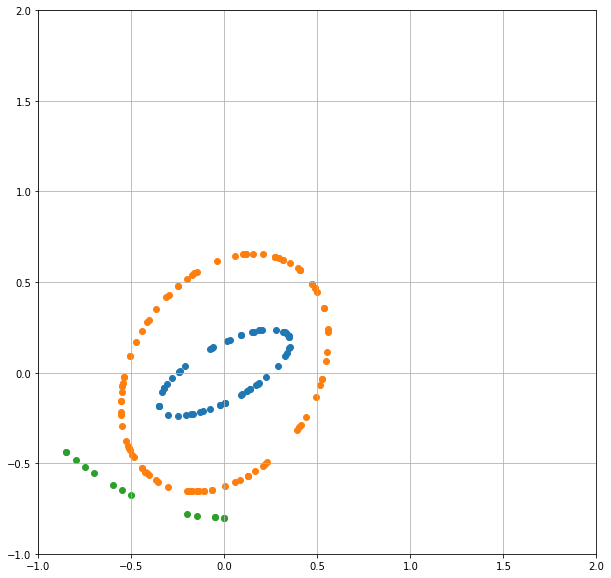

In [ ]:
points1 = points1[np.random.choice(len(points1), 60),:]
points2 = points2[np.random.choice(len(points2), 100),:]
points3 = points3[np.random.choice(len(points3), 120),:]

plt.figure(figsize=(10, 10))
plt.grid(True)
plt.gca().set_ylim([-1, 2])
plt.gca().set_xlim([-1, 2])
plt.scatter(points1[:, 0], points1[:, 1])
plt.scatter(points2[:, 0], points2[:, 1])
plt.scatter(points3[:, 0], points3[:, 1])
plt.show()

Разобъём на обучающую и тестовую выборки в сооношении 70 на 30.

In [ ]:
features = np.concatenate((points1, points2, points3))
targets = np.concatenate((\
                         np.tile(0, (len(points1), 1)),\
                         np.tile(1, (len(points2), 1)),\
                         np.tile(2, (len(points3), 1))))
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=19)

print(len(x_train) / len(features), len(x_test) / len(features))

0.7 0.3


Опишем функцию предсказания множества точек и отрисовки предсказанных точек и областей разных классов.

In [ ]:
def do_predict(model, x, y):
  y_pred = model.predict(x)
  acc = accuracy_score(y, y_pred)
  mse = mean_squared_error(y, y_pred)


  print(f"Accuracy = {acc}")
  print(f"MSE = {mse}")
  plt.figure(1)
  plt.title("Предсказание точек")

  plt.grid(True)
  plt.gca().set_ylim([-1, 2])
  plt.gca().set_xlim([-1, 2])
  

  mask = (y_pred == 0).reshape(len(y))
  plt.scatter(x[mask][:, 0], x[mask][:, 1] )
  
  mask = (y_pred == 1).reshape(len(y))
  plt.scatter(x[mask][:, 0], x[mask][:, 1])
  
  mask = (y_pred == 2).reshape(len(y))
  plt.scatter(x[mask][:, 0], x[mask][:, 1])

  plt.figure(2)
  plt.title("Области классов")
  plt.gca().set_ylim([-1, 2])
  plt.gca().set_xlim([-1, 2])

  lin = np.arange(-1, 2, 0.025)
  area = np.array(np.meshgrid(lin, lin))
  l = len(lin)

  points = area.reshape(2, l**2).T

  points_pred = model.predict(points)

  cmap_light = ListedColormap(['#ff0000', '#00ff00', '#0000ff'])

  plt.pcolormesh(area[0], area[1], points_pred.reshape(area[0].shape), cmap=cmap_light)

  


Обучим вероятностную модель с разбросом 0.3.

Accuracy = 0.7619047619047619
MSE = 0.23809523809523808


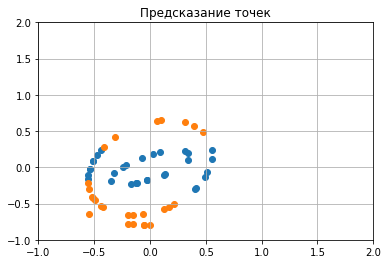

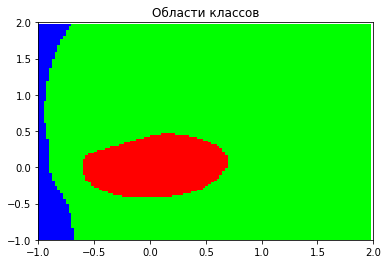

In [ ]:
model_pnn = PNN(std=0.3)
model_pnn.fit(x_train, y_train)
do_predict(model_pnn, x_test, y_test)

Обучим вероятностную модель с разбросом 0.1.

Accuracy = 0.9761904761904762
MSE = 0.023809523809523808


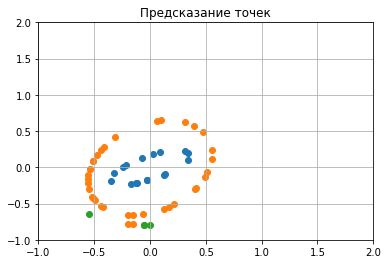

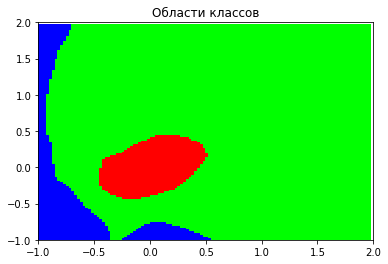

In [ ]:
model_pnn = PNN(std=0.1)
model_pnn.fit(x_train, y_train)
do_predict(model_pnn, x_test, y_test)

Обучим сеть с радиальнобазисными элементами и разбросом 0.3.

Accuracy = 1.0
MSE = 0.0


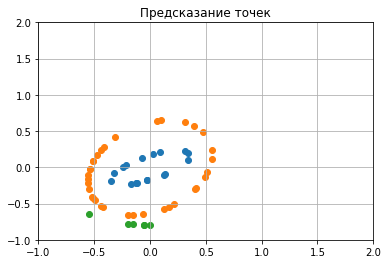

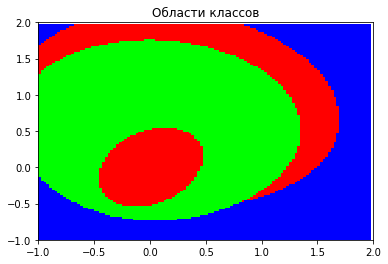

In [ ]:
model_RBF = SVC(kernel='rbf', C=1000, gamma=0.3)
model_RBF.fit(x_train, y_train)
do_predict(model_RBF, x_test, y_test)

Обучим сеть с радиальнобазисными элементами и разбросом 0.1.

Accuracy = 1.0
MSE = 0.0


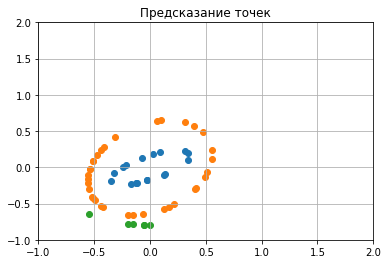

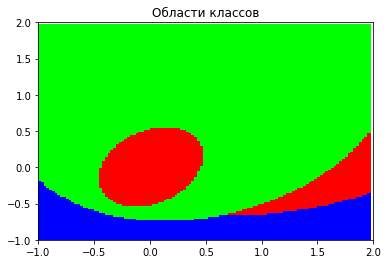

In [ ]:
model_RBF = SVC(kernel='rbf', C=1000, gamma=0.1)
model_RBF.fit(x_train, y_train)
do_predict(model_RBF, x_test, y_test)

Получим входной сигнал и отрисуем его.

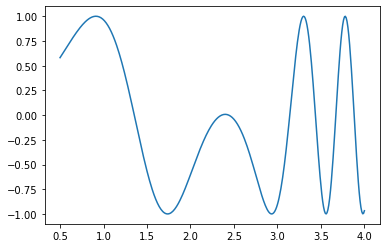

In [ ]:
func = lambda t : np.sin(np.sin(t) * t**2 + t)
time = np.arange(0.5, 4.000001, 0.01)
values = func(time)
plt.plot(time, values)

Опишем функцию обучения с нормализацией, обучением, предсказанием и отрисовкой тестовых данных.

In [ ]:
def fit_and_predict(model, x_train, y_train, x_test, y_test, fsize=(12, 7)):
  scaler_x = StandardScaler()
  scaler_y = StandardScaler()

  scaler_x.fit(x_train[:, np.newaxis])
  scaler_y.fit(y_train[:, np.newaxis])
  
  x_train_scaled = scaler_x.transform(x_train[:, np.newaxis])
  x_test_scaled = scaler_x.transform(x_test[:, np.newaxis])
  y_train_scaled = scaler_y.transform(y_train[:, np.newaxis])
  
  model.fit(x_train_scaled, y_train_scaled)

  y_train_pred = scaler_y.inverse_transform(model.predict(x_train_scaled)).flatten()
  y_test_pred =  scaler_y.inverse_transform(model.predict(x_test_scaled)).flatten()

  print(f"Train MSE = {mean_squared_error(y_train, y_train_pred)}")
  print(f"Test  MSE = {mean_squared_error(y_test , y_test_pred )}")
  
  plt.figure(1, figsize = fsize)
  plt.grid(True)
  plt.title("Train")

  plt.gca().set_xlim([np.min(np.concatenate((x_train, x_test))) - 0.001, 
                      np.max(np.concatenate((x_train, x_test))) + 0.001])
  plt.gca().set_ylim([np.min(np.concatenate((y_train, y_test))) - 0.001, 
                      np.max(np.concatenate((y_train, y_test))) + 0.001])

  plt.scatter(x_train, y_train, label="True train values", color="red")
  plt.scatter(x_train, y_train_pred, label="Predicted train values", color="orange")
  plt.legend()

  plt.figure(2, figsize =fsize)
  plt.grid(True)
  plt.title("Test")

  plt.gca().set_xlim([np.min(np.concatenate((x_train, x_test))) - 0.001, 
                      np.max(np.concatenate((x_train, x_test))) + 0.001])
  plt.gca().set_ylim([np.min(np.concatenate((y_train, y_test))) - 0.001, 
                      np.max(np.concatenate((y_train, y_test))) + 0.001])
   
  plt.scatter(x_test, y_test, label="True test values", color="purple")
  plt.scatter(x_test, y_test_pred, label="Predicted test values", color="green")
  plt.legend()

  plt.figure(3, figsize =fsize)
  plt.grid(True)
  plt.title("Train and Test")

  plt.gca().set_xlim([np.min(np.concatenate((x_train, x_test))) - 0.001, 
                      np.max(np.concatenate((x_train, x_test))) + 0.001])
  plt.gca().set_ylim([np.min(np.concatenate((y_train, y_test))) - 0.001, 
                      np.max(np.concatenate((y_train, y_test))) + 0.001])

  plt.scatter(x_train, y_train, label="True train values", color="red")
  plt.scatter(x_train, y_train_pred, label="Predicted train values", color="orange")
  
  plt.scatter(x_test, y_test, label="True test values", color="purple")
  plt.scatter(x_test, y_test_pred, label="Predicted test values", color="green")
  plt.legend()

Обучим обобщённо-регрессионную модель с разбросом 0.09.

Train MSE = 0.003839420815309925
Test  MSE = 1.0192153723605464


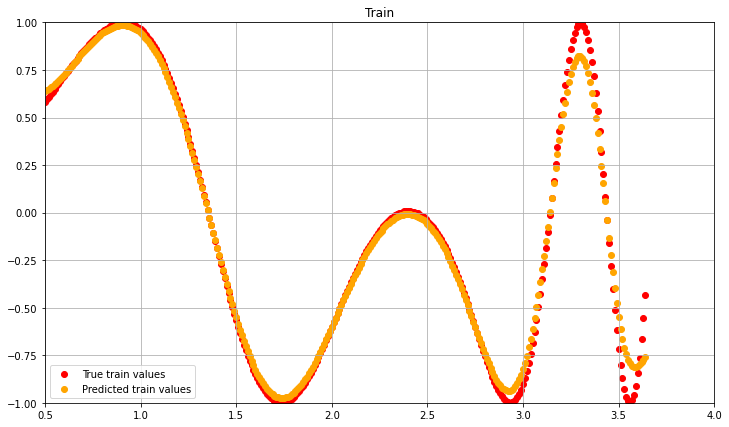

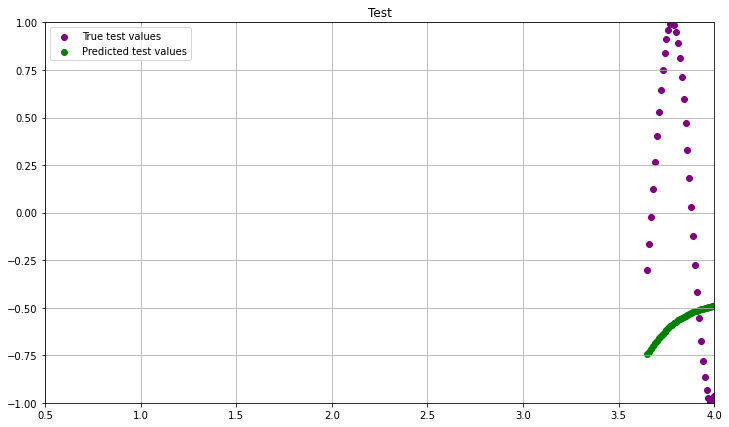

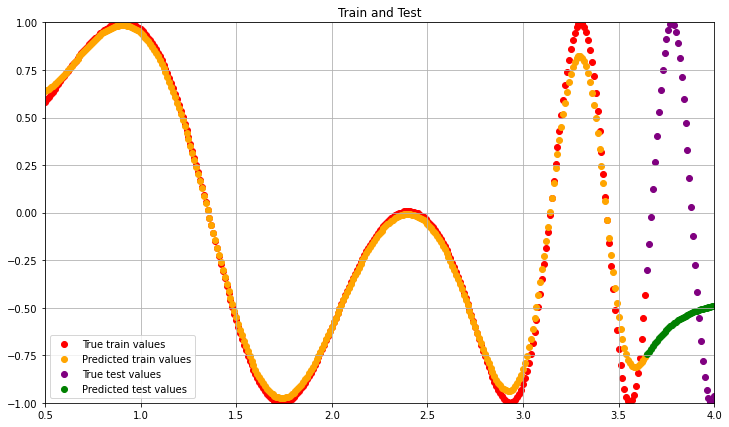

In [ ]:
model_GRNN = GRNN(std = 0.09)
n = int(len(time)*0.9)
fit_and_predict(model_GRNN, time[:n], values[:n], time[n:], values[n:])

Обучим обобщённо-регрессионную модель с разбросом 0.03 на "рыхлых" данных.

Train MSE = 0.000529763764998711
Test  MSE = 0.0009263329375351839


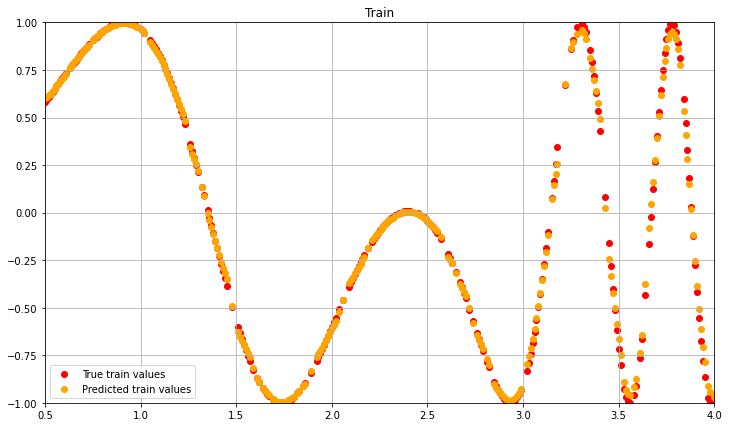

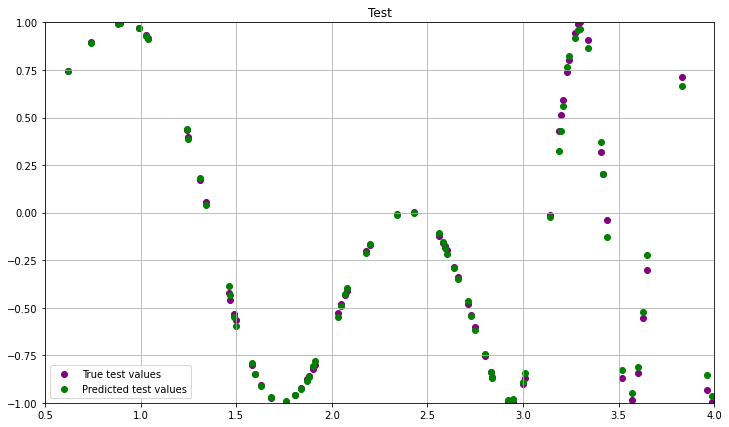

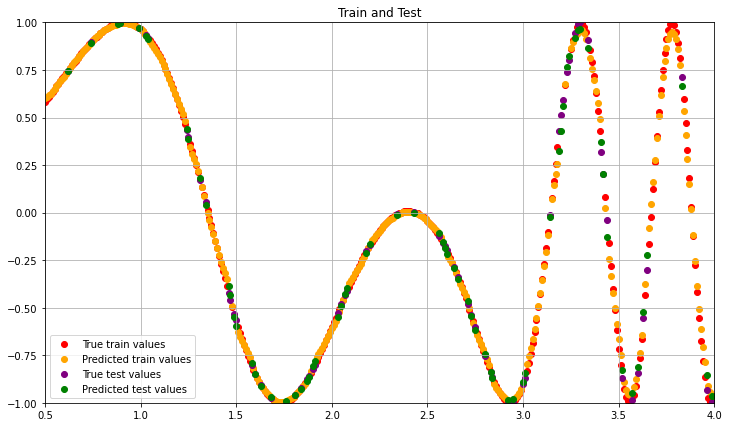

In [ ]:
model_GRNN = GRNN(std = 0.03)

x_train, x_test, y_train, y_test = train_test_split(time, values, train_size=0.8, shuffle=True, random_state = 1908)

fit_and_predict(model_GRNN, x_train, y_train, x_test, y_test)

# Вывод
Я ознакомился с сетями с радиальными базисными элементами. На полученных графиках видно, что модели справляются неплохо с задачей.